In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("AIML Dataset.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341829 entries, 0 to 341828
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            341829 non-null  int64  
 1   type            341829 non-null  object 
 2   amount          341829 non-null  float64
 3   nameOrig        341829 non-null  object 
 4   oldbalanceOrg   341829 non-null  float64
 5   newbalanceOrig  341829 non-null  float64
 6   nameDest        341828 non-null  object 
 7   oldbalanceDest  341828 non-null  float64
 8   newbalanceDest  341828 non-null  float64
 9   isFraud         341828 non-null  float64
 10  isFlaggedFraud  341828 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 28.7+ MB


In [9]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
df.value_counts()

step  type      amount      nameOrig     oldbalanceOrg  newbalanceOrig  nameDest     oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud
16    TRANSFER  3469083.04  C355323697   0.00           0.00            C930580526   6088540.58      10633977.31     0.0      0.0               1
1     CASH_IN   270.78      C619985571   4184966.65     4185237.43      C875917495   3019.00         0.00            0.0      0.0               1
                484.57      C1859216983  5422437.76     5422922.33      C657736958   5638778.53      5579568.65      0.0      0.0               1
                783.31      C1585711807  8150331.93     8151115.24      C284686302   2013.12         1229.81         0.0      0.0               1
16    TRANSFER  2248359.19  C1108709771  0.00           0.00            C25398786    6642251.36      8890610.55      0.0      0.0               1
                                                                                                                                               ..
1     CASH_IN   2643.45     C1574509514  6434890.26     6437533.71      C215145189   49974.00        1891.79         0.0      0.0               1
                2099.59     C685934      7096554.61     7098654.20      C1854778591  40471.79        0.00            0.0      0.0               1
                1271.77     C173738886   6973823.50     6975095.27      C932583850   697456.73       2719172.89      0.0      0.0               1
                1076.27     C217389263   3538789.28     3539865.55      C838411509   22774.25        23539.55        0.0      0.0               1
                911.76      C566760932   1335635.48     1336547.24      C1364913072  48321.60        47409.85        0.0      0.0               1
Name: count, Length: 341828, dtype: int64

In [11]:
df["isFraud"].value_counts()

,count
isFraud,
0.0,341635
1.0,193


In [12]:
df["isFlaggedFraud"].value_counts()

,count
isFlaggedFraud,
0.0,341828


In [13]:
df.isnull().sum().sum()

np.int64(5)

In [14]:
df.shape

(341829, 11)

In [15]:
round((df["isFraud"].value_counts()[1]/df.shape[0])*100,1)

np.float64(0.1)

In [16]:
round((df["isFraud"].value_counts()[1]/df.shape[0])*100,2)

np.float64(0.06)

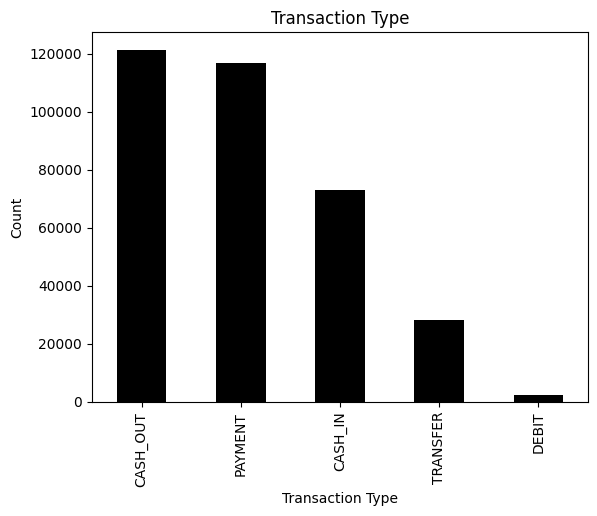

In [17]:
df["type"].value_counts().plot(kind="bar",title="Transaction Type", color ="black")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

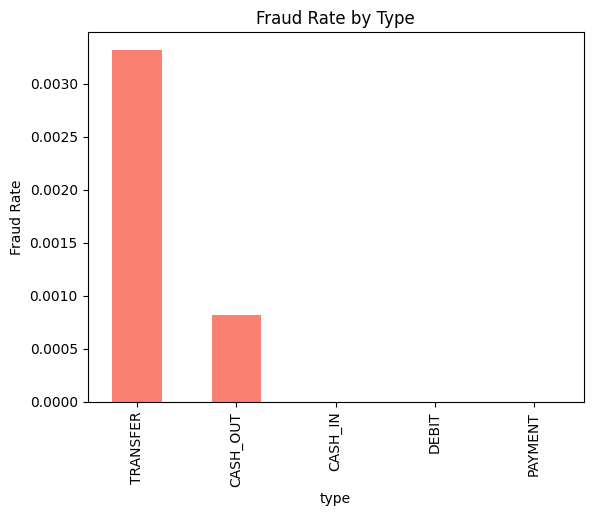

In [18]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar",title="Fraud Rate by Type", color ="salmon")
plt.ylabel("Fraud Rate")
plt.show()

In [19]:
df["amount"].describe().astype(int)

,amount
count,341829
mean,174597
std,293389
min,0
25%,13052
50%,79856
75%,231638
max,10000000


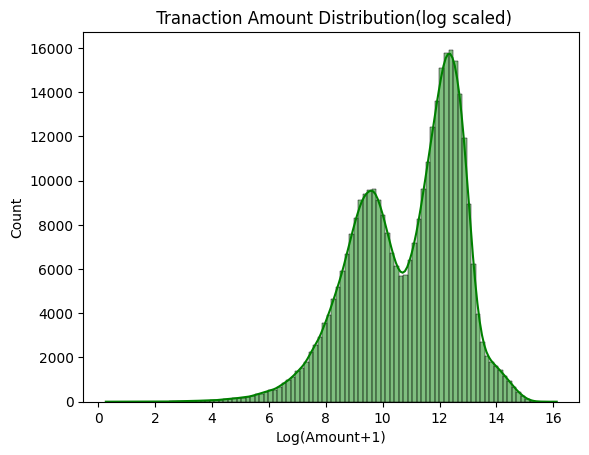

In [20]:
sns.histplot(np.log1p(df["amount"]), bins = 100,kde = True, color = "green")
plt.title(" Tranaction Amount Distribution(log scaled)")
plt.xlabel("Log(Amount+1)")
plt.show()

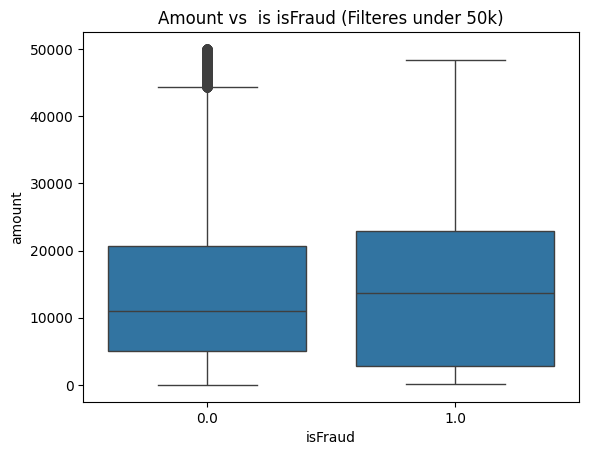

In [21]:
sns.boxplot(data= df[df["amount"]< 50000], x ="isFraud" , y= "amount")
plt.title("Amount vs  is isFraud (Filteres under 50k)")
plt.show()

In [22]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [23]:
df["balanceDiff0rig"] = df["oldbalanceOrg"]-df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"]-df["oldbalanceDest"]


In [24]:
(df["balanceDiff0rig"] < 0).sum()

np.int64(73057)

In [25]:
(df["balanceDiffDest"] < 0).sum()

np.int64(65843)

In [26]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiff0rig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

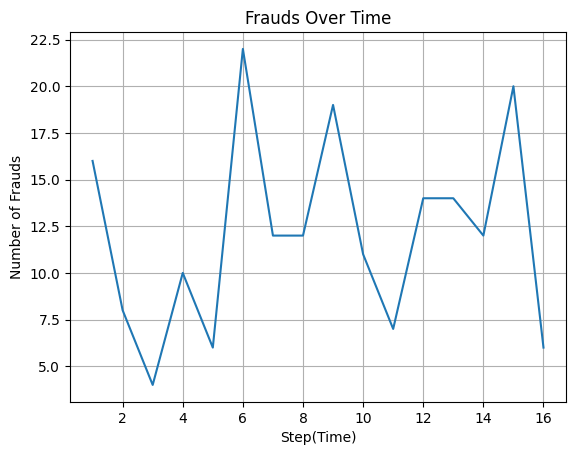

In [27]:
frauds_per_step = df[df["isFraud"]==1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index , frauds_per_step.values, label ="Frauds per step")
plt.xlabel("Step(Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show

In [28]:
df.drop(columns="step",inplace=True)

In [29]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiff0rig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,11668.14,0.0


In [30]:
top_senders = df["nameOrig"].value_counts().head(10)

In [31]:
top_senders

,count
nameOrig,
C779875094,2
C675934000,2
C1709295811,2
C44568807,2
C1842781381,2
C1250194175,2
C1710302637,2
C813633808,2
C746558292,2


In [32]:
top_recievers = df["nameDest"].value_counts().head(10)

In [33]:
top_recievers

,count
nameDest,
C985934102,85
C1286084959,84
C248609774,83
C665576141,80
C2083562754,79
C977993101,76
C1590550415,76
C1360767589,73
C451111351,72


In [34]:
fraud_users = df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [35]:
fraud_users

,count
nameOrig,
C1305486145,1
C840083671,1
C1420196421,1
C2101527076,1
C137533655,1
C1118430673,1
C749981943,1
C1334405552,1
C467632528,1


In [36]:
fraud_types = df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [37]:
fraud_types["type"].value_counts()

,count
type,
CASH_OUT,121306
TRANSFER,28302


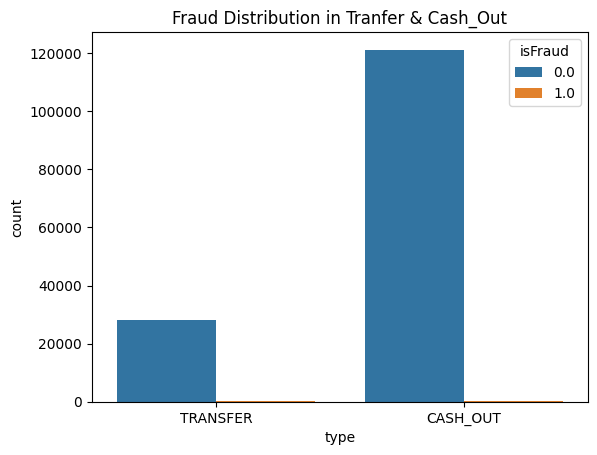

In [38]:
sns.countplot(data=fraud_types ,x="type", hue ="isFraud")
plt.title("Fraud Distribution in Tranfer & Cash_Out")
plt.show()

In [39]:
corr = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()

In [40]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.016852,-0.019270,0.214946,0.326079,0.047761
oldbalanceOrg,-0.016852,1.000000,0.999119,0.093715,0.063378,-0.001155
newbalanceOrig,-0.019270,0.999119,1.000000,0.095262,0.062672,-0.007230
oldbalanceDest,0.214946,0.093715,0.095262,1.000000,0.962950,-0.006684
newbalanceDest,0.326079,0.063378,0.062672,0.962950,1.000000,-0.003399
isFraud,0.047761,-0.001155,-0.007230,-0.006684,-0.003399,1.000000


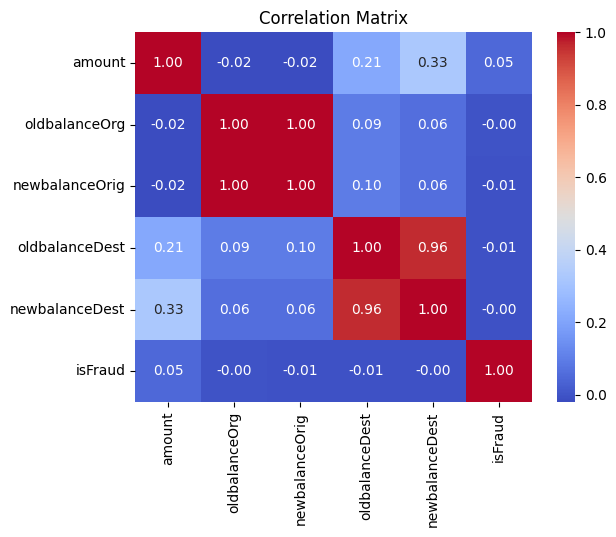

In [41]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [42]:
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0)&
    (df["newbalanceOrig"] == 0)&
    (df["type"].isin(["TRNSEFER","CASH_OUT"]))
]

In [43]:
len(zero_after_transfer)

48782

In [44]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiff0rig,balanceDiffDest
3,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1.0,0.0,181.00,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0.0,0.0,15325.00,46430.44
42,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0.0,0.0,26845.41,-286384.84
47,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0.0,0.0,1942.02,-6146.82
51,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.0,0.00,0.0,0.0,20411.53,-25742.00


In [45]:
df["isFraud"].value_counts()

,count
isFraud,
0.0,341635
1.0,193


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [47]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiff0rig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,11668.14,0.0


In [48]:
df_model = df.drop (["nameOrig","nameDest","isFlaggedFraud"], axis = 1)

In [49]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiff0rig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0,11668.14,0.0


In [50]:
categorical = ["type"]
numeric = ["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [51]:
y = df_model["isFraud"]
X = df_model.drop("isFraud", axis = 1)


In [52]:
X = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = df['isFraud']


In [53]:
X = pd.get_dummies(X, columns=['type'], drop_first=True)


In [54]:
print(df.isnull().sum())


type               0
amount             0
nameOrig           0
oldbalanceOrg      0
newbalanceOrig     0
nameDest           1
oldbalanceDest     1
newbalanceDest     1
isFraud            1
isFlaggedFraud     1
balanceDiff0rig    0
balanceDiffDest    1
dtype: int64


In [55]:
print(y.value_counts())
print(y.dtype)


isFraud
0.0    341635
1.0       193
Name: count, dtype: int64
float64


In [56]:
import numpy as np
import pandas as pd

# 1️⃣ Clean target column completely
df['isFraud'] = pd.to_numeric(df['isFraud'], errors='coerce')

# Remove NaN labels
df = df.dropna(subset=['isFraud'])

# Keep only valid classes
df = df[df['isFraud'].isin([0, 1])]

# 2️⃣ Remove infinite values from dataset
df = df.replace([np.inf, -np.inf], np.nan)

# 3️⃣ Fill remaining NaN in feature columns
df = df.fillna(0)

# 4️⃣ Build X and y
X = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = df['isFraud']

# 5️⃣ Convert text column
X = pd.get_dummies(X, columns=['type'], drop_first=True)

# 6️⃣ Final check (IMPORTANT)
print("NaN in X:", X.isnull().sum().sum())
print("NaN in y:", y.isnull().sum())


NaN in X: 0
NaN in y: 0


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify=y)

In [58]:
from pandas.core.arrays.categorical import Categorical
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        ("cat ", OneHotEncoder(drop = "first"), categorical)
    ],
    remainder  ="drop"
)

In [59]:
pipeline = Pipeline([
    ("prep",preprocessor),
    ("clf",LogisticRegression(class_weight="balanced", max_iter=200))
])

In [60]:
df['isFraud'] = pd.to_numeric(df['isFraud'], errors='coerce')
df = df.dropna(subset=['isFraud'])
df = df[df['isFraud'].isin([0, 1])]

df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0)

# ================= FEATURES =================
# DO NOT USE get_dummies here
X = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = df['isFraud']

# ================= SPLIT =================
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

# ================= PREPROCESSOR =================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_features = ['type']  # THIS COLUMN EXISTS NOW
numeric_features = X.columns.drop('type')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# ================= PIPELINE =================
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=200))
])

# ================= TRAIN =================
pipeline.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud', 'balanceDiff0rig',
       'balanceDiffDest'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=200))])

In [61]:
y_pred = pipeline.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92    102491
         1.0       0.00      0.93      0.01        58

    accuracy                           0.86    102549
   macro avg       0.50      0.89      0.46    102549
weighted avg       1.00      0.86      0.92    102549



In [62]:
confusion_matrix(y_test,y_pred)

array([[87770, 14721],
       [    4,    54]])

In [63]:
pipeline.score(X_test, y_test)*100

85.64101063881657

In [64]:
import joblib
joblib.dump(pipeline,"fraud_detection_pipeline.pkl")





['fraud_detection_pipeline.pkl']

In [65]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiff0rig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,11668.14,0.0


In [66]:
!pip install streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 81.9 MB/s eta 0:00:00


In [67]:
import streamlit as st
import numpy as np
import pandas as pd
import joblib

# Load model
model = joblib.load("fraud_detection_pipeline.pkl")


In [68]:
%%writefile app.py
import streamlit as st
import pandas as pd


model = joblib.load("fraud_detection_pipeline.pkl")

st.title("Fraud Detection Prediction App")

transaction_type = st.selectbox("Transaction Type", ["PAYMENT","TRANSFER","CASH_OUT"])
amount = st.number_input("Amount", min_value=0.0, value=100.0)
oldbalanceOrg = st.number_input("Old Balance (Sender)", min_value=0.0, value=0.0)
newbalanceOrg = st.number_input("New Balance (Sender)", min_value=0.0, value=0.0)
oldbalanceDest = st.number_input("Old Balance (Receiver)", min_value=0.0, value=0.0)
newbalanceDest = st.number_input("New Balance (Receiver)", min_value=0.0, value=0.0)

if st.button("Predict"):
    input_data = pd.DataFrame([{
        "type": transaction_type,
        "amount": amount,
        "oldbalanceOrg": oldbalanceOrg,
        "newbalanceOrg": newbalanceOrg,
        "oldbalanceDest": oldbalanceDest,
        "newbalanceDest": newbalanceDest
    }])

    prediction = model.predict(input_data)[0]

    if prediction == 1:
        st.error("This transaction can be fraud")
    else:
        st.success("This transaction looks safe")


Writing app.py


In [69]:
!streamlit run app.py &>/dev/null &


In [70]:
!npm install -g localtunnel
!pip install streamlit


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴
added 22 packages in 6s
⠴
⠴3 packages are looking for funding
⠴  run `npm fund` for details
⠴Requirement already satisfied: streamlit in /usr/local/lib/python3.12/dist-packages (1.53.1)


In [71]:
!streamlit run app.py &>/dev/null &


In [72]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np

# Load trained model
model = pickle.load(open("fraud_detection_pipeline.pkl"))

st.title("Fraud Detection System")

st.write("Enter transaction details")

amount = st.number_input("Transaction Amount")
oldbalanceOrg = st.number_input("Old Balance Sender")
newbalanceOrig = st.number_input("New Balance Sender")
oldbalanceDest = st.number_input("Old Balance Receiver")
newbalanceDest = st.number_input("New Balance Receiver")

if st.button("Check Fraud"):
    features = np.array([[amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest]])
    prediction = model.predict(features)

    if prediction[0] == 1:
        st.error("⚠️ Fraudulent Transaction!")
    else:
        st.success("✅ Legit Transaction")


Overwriting app.py


In [73]:
!pip install streamlit --quiet
!streamlit run app.py &>/dev/null &


In [ ]:
!wget -q -O cloudflared https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared
!./cloudflared tunnel --url http://localhost:8501


2026-01-29T13:02:09Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2026-01-29T13:02:09Z INF Requesting new quick Tunnel on trycloudflare.com...
2026-01-29T13:02:11Z INF +--------------------------------------------------------------------------------------------+
2026-01-29T13:02:11Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2026-01-29T13:02:11Z INF |  https://chrome-corporate-bachelor-care.trycloudflare.